In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math
from matplotlib.ticker import Locator
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import cm
import os
from copy import deepcopy
import glob
import _data_loader
from _data_loader import *


# Read and plot multiple datasets
### List all *a? files in directory

In [2]:
_dir = r'C:\Users\Dominik\Documents\MUNI\Organic Photochemistry\Projects\Python scripts\Heat map plotter\190319_fs_fla_NF'  # directory to read

groups = get_groups(_dir)
groups

[['C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\Projects\\Python scripts\\Heat map plotter\\190319_fs_fla_NF\\2019_03_19_FLA_NF_MeOH_20ps_1.a0',
  'C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\Projects\\Python scripts\\Heat map plotter\\190319_fs_fla_NF\\2019_03_19_FLA_NF_MeOH_20ps_1.a1',
  'C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\Projects\\Python scripts\\Heat map plotter\\190319_fs_fla_NF\\2019_03_19_FLA_NF_MeOH_20ps_1.a2'],
 ['C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\Projects\\Python scripts\\Heat map plotter\\190319_fs_fla_NF\\2019_03_19_FLA_NF_MeOH_20ps_2.a0'],
 ['C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\Projects\\Python scripts\\Heat map plotter\\190319_fs_fla_NF\\2019_03_19_FLA_NF_MeOH_20ps_3.a0',
  'C:\\Users\\Dominik\\Documents\\MUNI\\Organic Photochemistry\\Projects\\Python scripts\\Heat map plotter\\190319_fs_fla_NF\\2019_03_19_FLA_NF_MeOH_20ps_3.a1',
  'C:\\Users\\Dominik\\Documents

### Plot all data

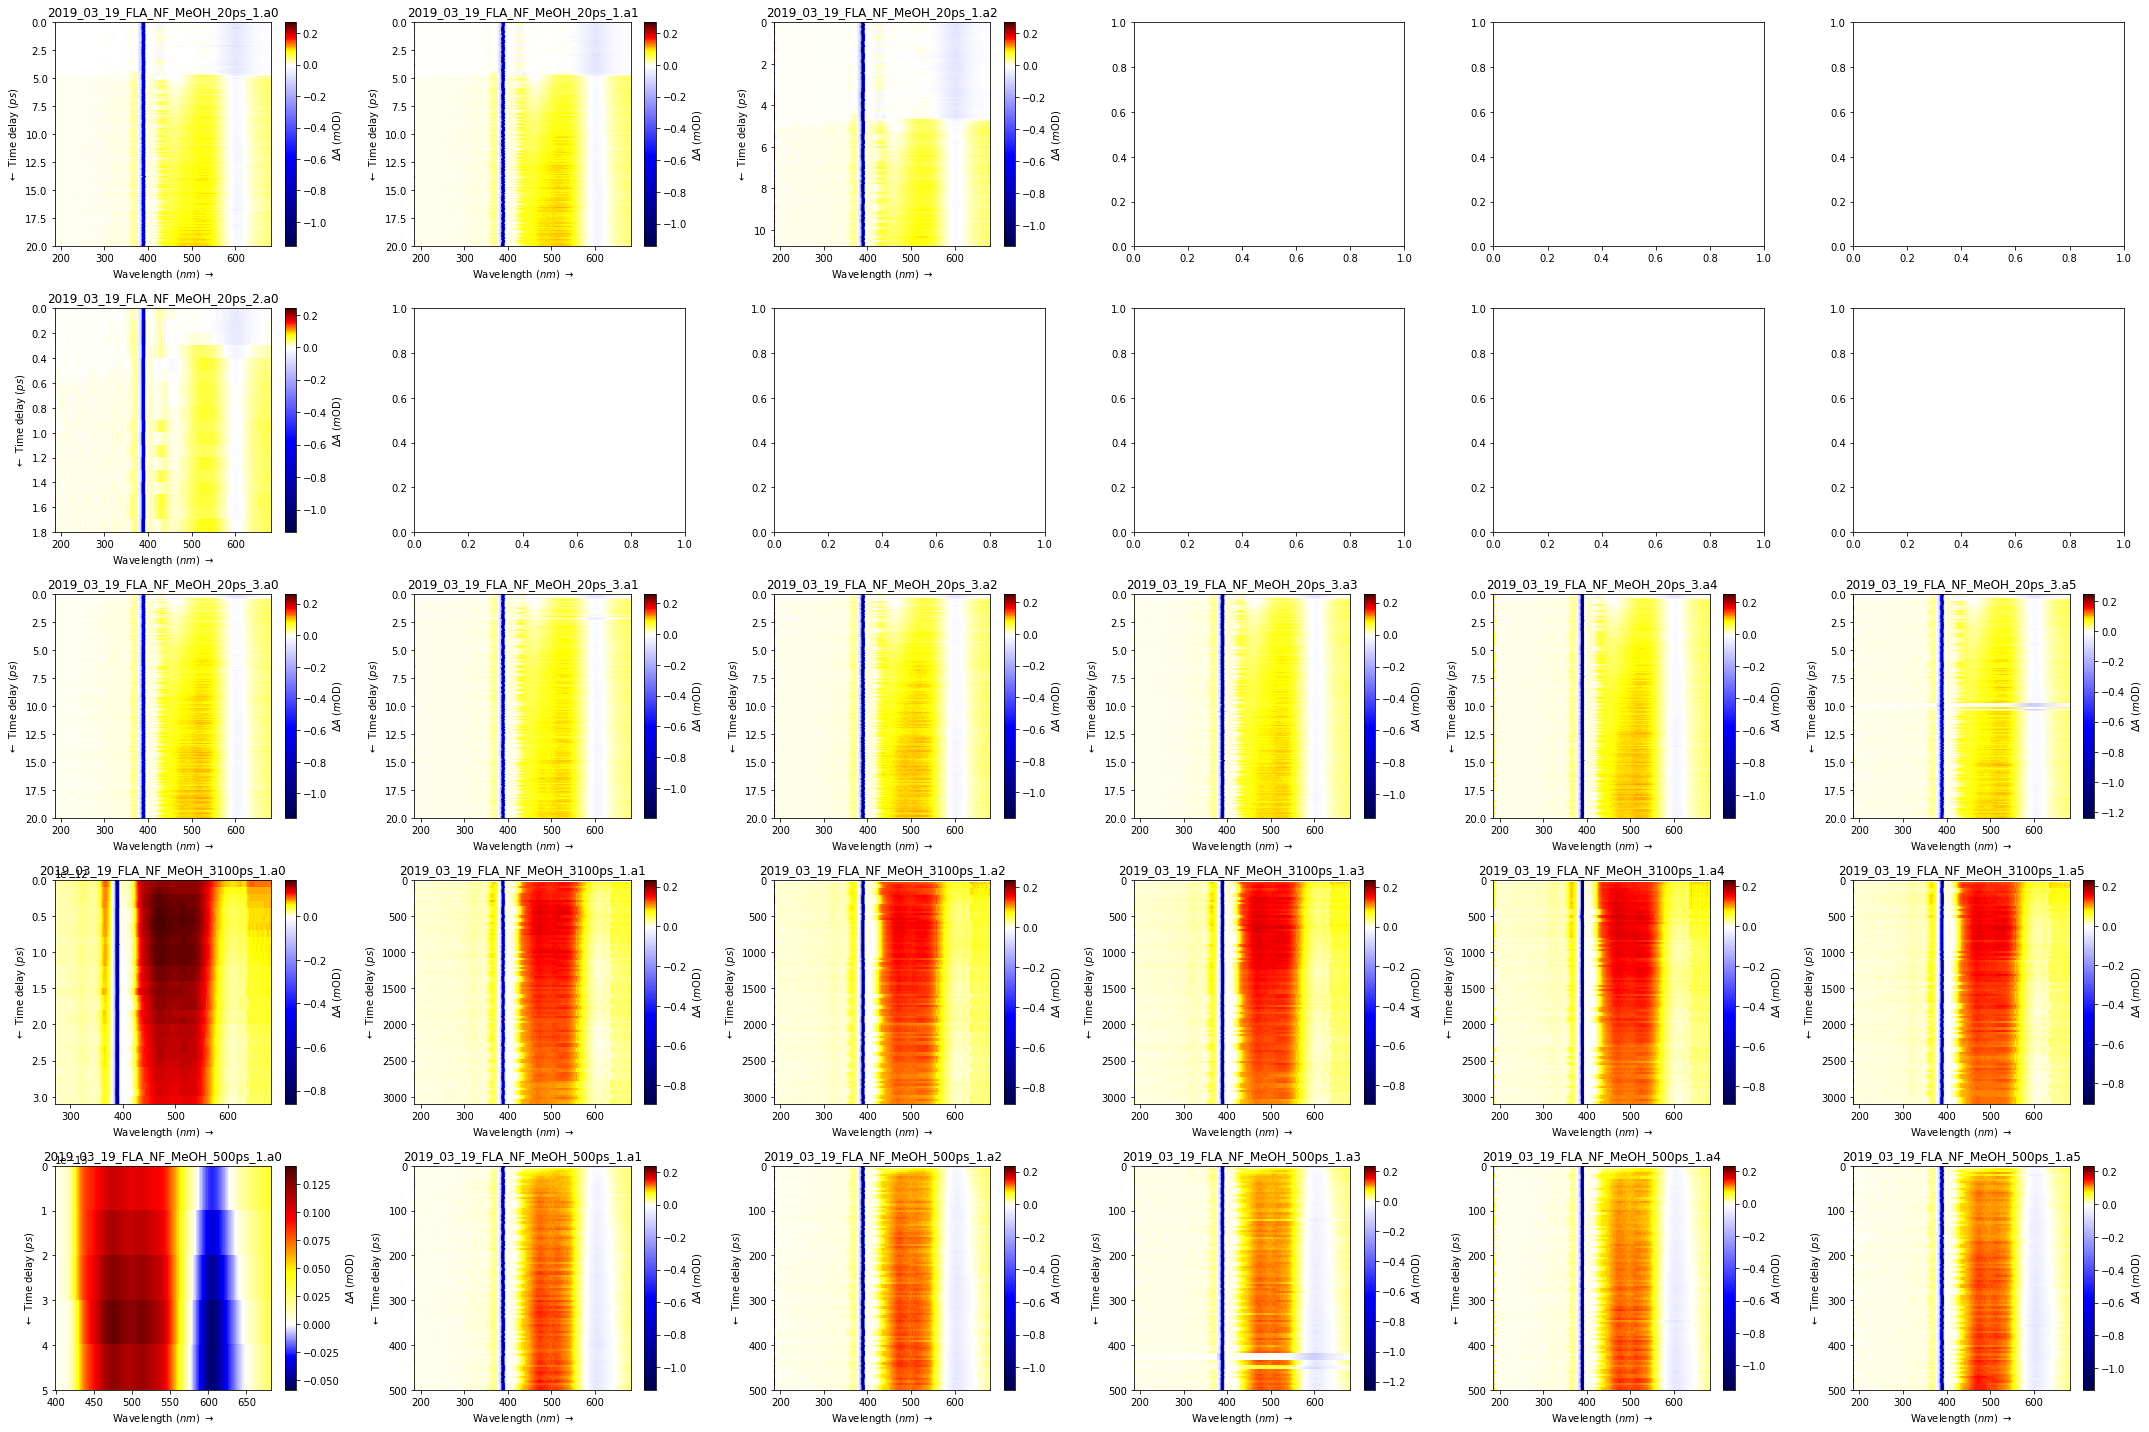

In [3]:
data = load_groups(groups)
plot_matrix(data)
# type(data[0][0]) == Data

### Select data

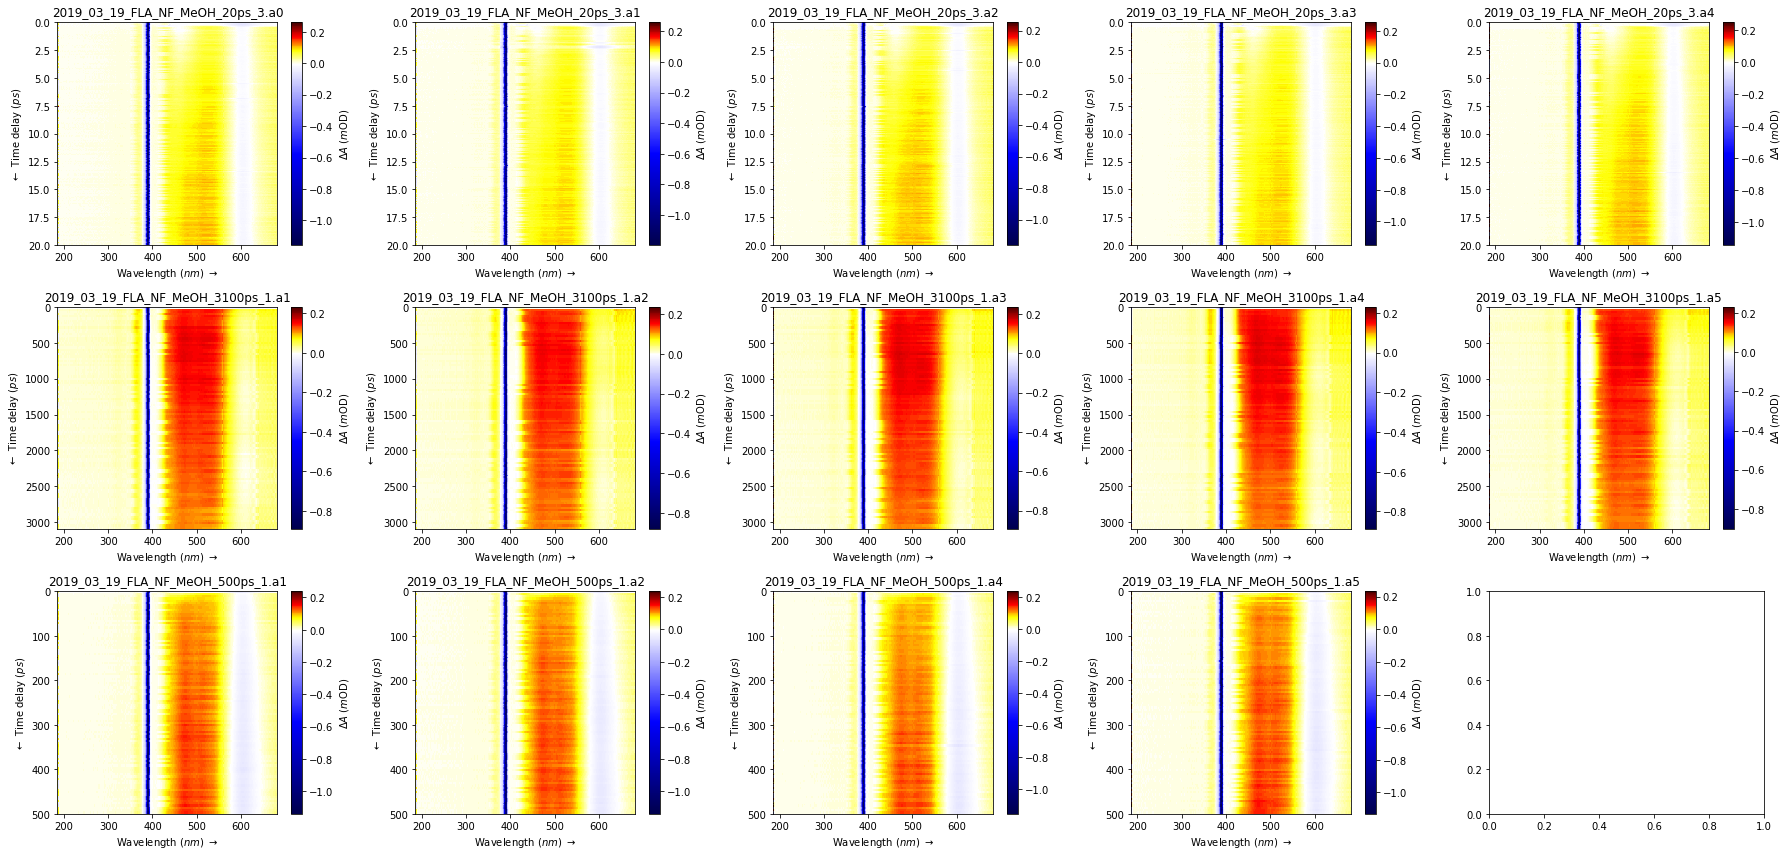

In [3]:
# select only datasets that consists of more than 5 measurements, i.e. file a0 - a5
g1 = get_groups(_dir, condition=lambda grp_len: grp_len > 3)
del g1[1][0]
del g1[2][3]
del g1[2][0]
del g1[0][5]

# del g1[:2]

g1

data = load_groups(g1)
plot_matrix(data)


## Average datasets

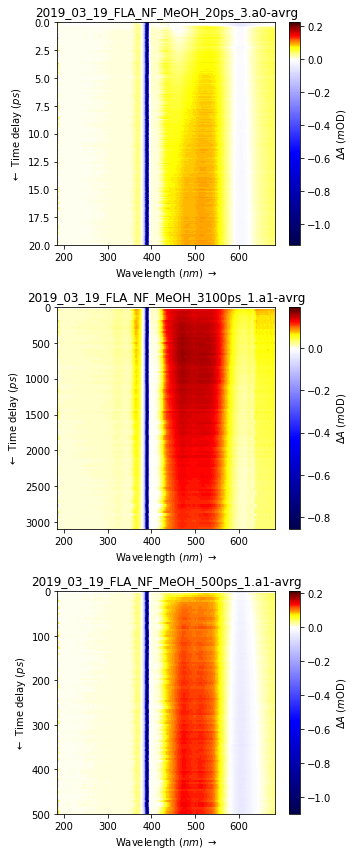

In [4]:
data_avrg = average(data)

# data_avrg[0,0].D.shape

plot_matrix(data_avrg)

# Merge datasets and plot

In [10]:
final_data = merge(data_avrg)

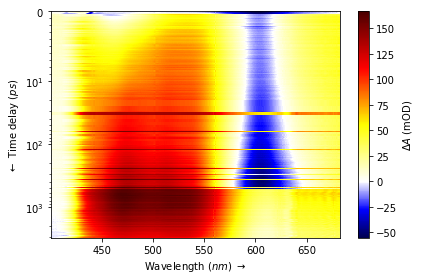

In [11]:

plot_data(final_data, D_mul_factor=1e3, symlog=True, t0=0, t1=None, w0=400, w1=None, fig_size=(6, 4),
          cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=10, linscale=1, zmin=None, zmax=None)

In [114]:
def save_matrix_to_Glotaran(data, fname='output-GLOTARAN-long.ascii', delimiter='\t', encoding='utf8'):
    mat = np.vstack((data.wavelengths, data.D))
#     t = np.concatenate([[0], data.times * 1e-3])
#     mat = np.hstack((t.reshape(-1, 1), mat))
    
    buffer = f'Header\nOriginal filename: fname\nTime explicit\nintervalnr {data.times.shape[0]}\n'
    buffer += delimiter + delimiter.join(f"{num}" for num in data.times) + '\n'
    buffer += '\n'.join(delimiter.join(f"{num}" for num in row) for row in mat.T)
    
    with open(fname, 'w', encoding=encoding) as f:
        f.write(buffer)
    
#     np.savetxt(fname, mat, delimiter=delimiter)
    

save_matrix_to_Glotaran(final_data, fname='2020_01_23_E_10ps-GLOTARAN.ascii')

# Baseline correction

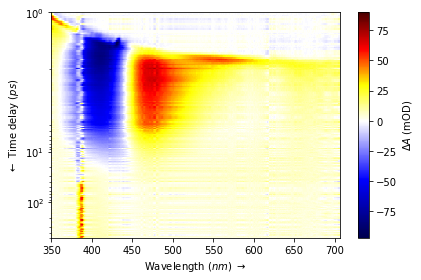

In [100]:
def baseline_corr(data, t0=0, t1=300):
    t_idx_start = find_nearest_idx(data.times, t0) if t0 is not None else 0
    t_idx_end = find_nearest_idx(data.times, t1) + 1 if t1 is not None else data.D.shape[0]
    
    # crop the data if necessary
    D_cut = data.D[t_idx_start:t_idx_end, :]
    avrg = np.average(D_cut, axis=0)
    
    data.D -= avrg
    
    return data

final_data = baseline_corr(final_data, t0=0, t1=0.5)

plot_data(final_data, D_mul_factor=1e3, symlog=True, t0=1, t1=None, w0=350, w1=None, fig_size=(6, 4),
          cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500, linthresh=3, linscale=3, zmin=None, zmax=None)


In [64]:
### ! CHANGE THE FILENAME OF YOUR DATA HERE !
fname = 'Andrea/2019_11_05_Zn_TcPP_MeOH_3100ps_filtr_1.a0-AVERAGE_SPECFIT.txt'

fname_no_ext = os.path.splitext(fname)[0].lower()
data = np.loadtxt(fname, delimiter='\t', skiprows=3, dtype=np.float64)
times = data[0, 1:]
wavelengths = data[1:, 0]
D = data[1:, 1:].T  # also, transpose the data, so that rows contains spectra and columns traces

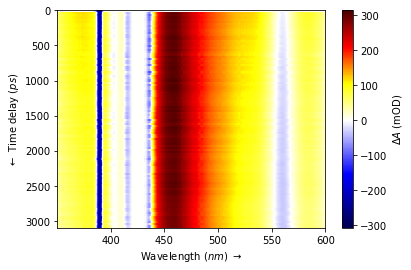

In [69]:
filepath = fname_no_ext + '.png'

plot_data(D*1e3, times*1e-3, wavelengths, symlog=False, t0=1, t1=None, w0=350, w1=600, fig_size=(6, 4),
          cmap='diverging', t_unit='$ps$', title='', filepath=None, dpi=500)
